# MC Dropout Metrics evaluation

In [1]:
%load_ext autoreload

In [3]:
import os, sys, importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

os.listdir(METRICS_PATH)

['mc_dropout_max_entropy.epoch=2.step_size=1.csv',
 'mc_dropout_max_entropy.limit=30.csv',
 'old_metrics',
 'mc_dropout_max_entropy.epoch=2.step_size=1.init_size=1.csv',
 'mc_dropout_max_entropy.csv']

In [9]:
sys.path.append(MODULES_PATH)

from active_learning import Metrics

In [23]:
%autoreload 2
metrics_reader = Metrics(os.path.join(METRICS_PATH, "mc_dropout"))

## Read Metrics

In [67]:
data = metrics_reader.read("4_mc_dropout_max_entropy.csv")

In [74]:
def get_frame(filename, astype = {"iteration": "int32", "binary_accuracy": "float32"}):
    metrics_reader = Metrics(os.path.join(METRICS_PATH, "mc_dropout"))
    data = metrics_reader.read(filename)
    df = pd.DataFrame(data)
    df = df.astype(astype)
    return df

In [79]:
df_2 = get_frame("3_mc_dropout_max_entropy.csv")
df_2.head()

,iteration,loss,binary_accuracy
0,0,0.22087104618549347,0.958593
1,1,4.33430290222168,0.696617
2,2,2.517911434173584,0.810284
3,3,2.3086986541748047,0.816238
4,4,0.9173535704612732,0.894723


In [77]:
df_1 = get_frame("4_mc_dropout_max_entropy.csv")
df_1.head()

,iteration,loss,binary_accuracy
0,0,0.02116580680012703,0.993505
1,1,0.11715037375688553,0.978890
2,2,0.03956377133727074,0.992693
3,3,0.18683086335659027,0.976455
4,4,0.06211743876338005,0.990257


In [88]:
df_3 = get_frame("2_mc_dropout_max_entropy.csv")
df_3.head()

,iteration,loss,binary_accuracy
0,0,1.7131491899490356,0.664141
1,1,0.036550626158714294,0.989445
2,2,0.11840952932834625,0.972666
3,3,0.12459225952625275,0.974290
4,4,0.13670805096626282,0.976184


In [89]:
df = df.astype({"iteration": "int32", "binary_accuracy": "float"})

In [90]:
max_tick = int(df_1["iteration"].max())
min_tick = int(df_1["iteration"].min())

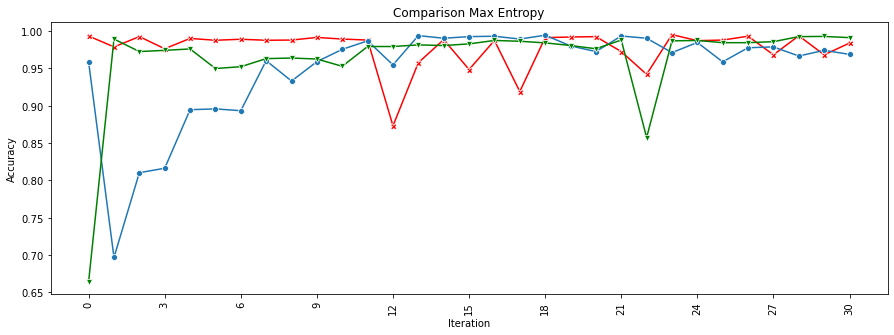

In [101]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="iteration", y="binary_accuracy", color="red", marker="X", data=df_1)
sns.lineplot(x="iteration", y="binary_accuracy", marker="o", data=df_2)
sns.lineplot(x="iteration", y="binary_accuracy", color="green", marker="v", data=df_3)
plt.xticks(range(min_tick, max_tick + 2, 3), rotation=90)
plt.title("Comparison Max Entropy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.show()